# Numpy
## Objectives
- Understand how numpy arrays are different from python lists.
- Create arrays in numpy of a given shape.
- Use broadcasting to combine arrays.
- Index into numpy arrays:
    - List style indexing and slicing.
    - Fancy indexing.
    - Boolean indexing.
- Use some numpy methods to process arrays:
    - Mathematical functions.
    - Aggregations.
    - Aggregation across axies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Numpy: Efficient Array Compuation in Python

**Numpy** is the library behind almost all of the numerical and scientific computing in python.  It's quite true that if it were not for numpy, Python would not be a player in the data science world.

**Note**: It's pronounced **num-pie** as in **pie-thon**, not **num-pee**.

Numpy's major feature is its `array` data type (technically, it's called an `ndarray`, but everyone just calls them arrays).

Numpy arrays, on the face of it, look a lot like python lists:

In [2]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

And you can do pretty much anything to a numpy array that you could do to a list:

In [3]:
x[2]

2

In [4]:
x[:5]

array([0, 1, 2, 3, 4])

In [5]:
x[1:8:2]

array([1, 3, 5, 7])

In [6]:
x[0] = 100
x

array([100,   1,   2,   3,   4,   5,   6,   7,   8,   9])

But, under the hood, very different things are going on...

  - Numpy arrays can hold one and only one type of data.
  - Numpy arrays are **super efficient** both in terms of memory footprint **and** computational efficiency.
  - Numpy arrays have a size, and the size cannot be changed.
  - Numpy arrays have a **shape**, which allows them to be multi-dimensional (examples forthcoming).

## Constraints on Arrays

One major difference between arrays and lists is that arrays **cannot be extended**.

In [8]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x.append(10)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

Numpy arrays have a fixed size, which cannot be changed.

In [9]:
x.size

10

So as a consequence, if you want to create a numpy array to hold some data, you **need to know how much array you need at the time the array is created**.

## Reshaping Arrays

Although the total size of an array **cannot** be changed, the **shape** of the array can be changed, **as long as this change of shape does not create or destroy elements** (i.e., as long as the reshaping does not change the **size** of the array).

In [10]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
x.shape

(10,)

In [12]:
x.reshape((5, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [13]:
x.reshape((2, 5))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [14]:
x.reshape((10, 1))

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [15]:
x.reshape((1, 10))

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

Reshaping is very efficient, but it does **not** make a copy of the array!

In [16]:
y = x.reshape((2, 5))
y

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [17]:
y[1, 0] = 999
y

array([[  0,   1,   2,   3,   4],
       [999,   6,   7,   8,   9]])

In [18]:
x

array([  0,   1,   2,   3,   4, 999,   6,   7,   8,   9])

To make a copy of an array, use the `copy` method:

In [19]:
x = np.arange(10)
y = x.copy()
y[0] = 999

In [20]:
y

array([999,   1,   2,   3,   4,   5,   6,   7,   8,   9])

In [21]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Creating Numpy Arrays

### np.zeros

`np.zeros` creates a new array of a given size, and fills it with zeros.

In [22]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

You can also create a **multi-dimensional** array by passing a tuple as the shape:

In [23]:
np.zeros((5, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### np.ones

This is just like `np.zeros`, but it fills the array with ones.

In [24]:
x = np.ones(10)
x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [25]:
for idx, n in enumerate(range(10)):
    # Some expensive computation...
    x[idx] = n

In [26]:
x

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

### np.full

If you want another constant in your array, use `np.full`.

In [27]:
np.full(shape=(3, 4), fill_value=np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

In [28]:
np.full((3, 4), np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

### np.linspace

`np.linspace` creates an equally spaced grid of numbers between two endpoints.

In [29]:
np.linspace(0, 1, num=11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [30]:
np.linspace(0, 10, num=11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [31]:
np.linspace(0, 1, num=21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

### np.arange

`np.arange` is just like the built in `range`, but it makes an array.

In [38]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
np.arange(2, 10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

### np.random.uniform & np.random.normal

The `np.random` subpackage contains some functions for creating arrays of random numbers.  These two are the most useful, but there are more!

In [41]:
np.random.uniform(low=0.0, high=10.0, size=10).round(2)

array([4.09, 5.68, 4.01, 5.48, 2.07, 6.93, 2.54, 9.61, 6.29, 5.3 ])

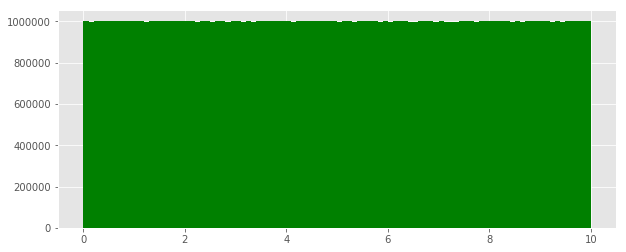

In [42]:
unif = np.random.uniform(low=0.0, high=10.0, size=10**8) # replace 9 with 8

fig, ax = plt.subplots(figsize=(10, 4))
_ = ax.hist(unif, bins=100, color="green")

In [43]:
np.random.normal(loc=0.0, scale=1.0, size=10)#.round(2)

array([-0.24997211,  1.16118383, -0.6930589 , -0.8819825 ,  0.09462446,
       -1.41856568,  0.56025058,  1.48261728, -0.92225981, -1.6678501 ])

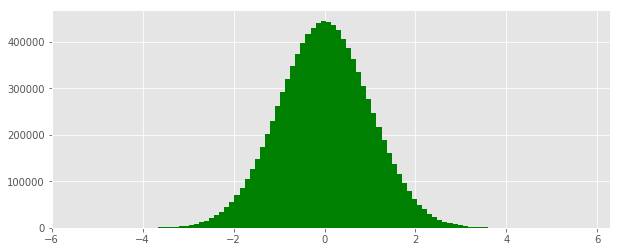

In [44]:
unif = np.random.normal(loc=0.0, scale=1.0, size=10**7)

fig, ax = plt.subplots(figsize=(10, 4))
_ = ax.hist(unif, bins=100, color="green")

## Broadcasting

### Boradcasting: Equal Length Arrays

One of the most useful features of arrays is called **broadcasting**.  At its most basic, boradcasting means that any arithmetic operation applied to an array is interpreted as being applied **element by element**.

In [49]:
x = np.array([1, 2, 3, 4, 5,  6])
y = np.array([2, 4, 6, 8, 10, 12])

In [50]:
x + y

array([ 3,  6,  9, 12, 15, 18])

In [51]:
x - y

array([-1, -2, -3, -4, -5, -6])

In [52]:
x * y

array([ 2,  8, 18, 32, 50, 72])

In [53]:
y / x

array([2., 2., 2., 2., 2., 2.])

In [54]:
y % x

array([0, 0, 0, 0, 0, 0])

### Broadcasting With a Constant

This is all pretty clear cut when the arrays have the **same shape**, but it's more powerful that that.

You can replace one of the arrays with a **constant** and that constant will be treated as if it were an entire array:

In [55]:
2 * x

array([ 2,  4,  6,  8, 10, 12])

In [56]:
y / 2

array([1., 2., 3., 4., 5., 6.])

In [57]:
x % 2

array([1, 0, 1, 0, 1, 0])

You can also broadcast with comparison operators, this is **very useful** when combined with something we'll talk about later:

In [58]:
x <= 3

array([ True,  True,  True, False, False, False])

In [59]:
y / 2 == x

array([ True,  True,  True,  True,  True,  True])

If you need to combine boolean arrays with logical operators, broadcasting also applys to the `&` (and) and `|` (or) operators:

In [60]:
(x <= 2) | (x >= 5)

array([ True,  True, False, False,  True,  True])

In [61]:
(x >= 2) & (x <= 5)

array([False,  True,  True,  True,  True, False])

### Broadcasting Multi-dimensional Arrays

Broadcasting also works for multi-dimensional arrays, but it takes some practice and getting used to.

#### Restrictions
Broadcasting can only be performed when the shape of each dimension in the arrays are equal and/or one has the dimension size of 1. 

In [62]:
x = np.ones((5, 4))
x

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

The constant (scalar) case is the same as it ever was:

In [63]:
2 * x

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

But now things get pretty intersting.  If you broadcast with a one dimensional array, cool stuff happens:

In [64]:
b = np.array([1, 2, 3, 4])
x * b

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

Note that `b` must have the correct shape for this to happen; refer to the restrictions

In [65]:
print("Shape of x:", x.shape)
print("Shape of b:", b.shape)

Shape of x: (5, 4)
Shape of b: (4,)


To get the same behaviour, but with the **rows** scaled, we need to do some gymnsatics.

In [68]:
b = np.array([1, 2, 3, 4, 5])
#x * b

This doesn't work because `x` is 2d and `b` is 1d.

In [56]:
print("Shape of x:", x.shape)
print("Shape of b:", b.shape)

Shape of x: (5, 4)
Shape of b: (5,)


To get this to work, we need to rehsape `b`.

In [69]:
b_reshaped = b.reshape((5, 1))

Note how the both first dimensions, **and the number of dimensions** of the arrays match now:

In [70]:
print("Shape of x         :", x.shape)
print("Shape of b_reshaped:", b_reshaped.shape)

Shape of x         : (5, 4)
Shape of b_reshaped: (5, 1)


In case the two arrays have the same number of dimensions, as long as the dimensions **either** match, or one of them is **exactly one**, the arrays will broadcast:

In [71]:
x * b_reshaped

array([[1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.]])

The unit length dimensions are **stretched** to until the arrays have the same shape, then they are broadcast.

**Note:** We could also accomplish the first example with the same reshape principle.

In [75]:
b = np.array([1, 2, 3, 4])
b_reshaped = b.reshape((1, 4))

Note how all non-unit dimensions match:

In [76]:
print("Shape of x         :", x.shape)
print("Shape of b_reshaped:", b_reshaped.shape)

Shape of x         : (5, 4)
Shape of b_reshaped: (1, 4)


So we can broadcast:

In [77]:
x * b_reshaped

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

## Indexing Numpy Arrays

Numpy arrays support all the usual indexing shenanigans that lists do, so we won't comment on those any more.

### Indexing Multi-dimensional Arrays

The usual list style indexing extends to multi-dimensional arrays:

In [78]:
x = np.arange(20).reshape((5, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [79]:
# First two rows.
x[:2, :]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [80]:
# First two columns.
x[:, :2]

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13],
       [16, 17]])

In [81]:
# First two rows and first two columns
x[:2, :2]

array([[0, 1],
       [4, 5]])

In [82]:
# Even numbered rows and columns
x[::2, ::2]

array([[ 0,  2],
       [ 8, 10],
       [16, 18]])

You can combine this with assignment to surgically alter arrays:

In [83]:
x[:2, :2] = np.mean(x)
x

array([[ 9,  9,  2,  3],
       [ 9,  9,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

### Fancy Indexing

You can index an array with **another array** (or a list), and this is often referred to as **fancy indexing**.

In [84]:
x = np.arange(0, 20, 2)
x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [85]:
x[[0, 0, 4, 4, 2, 2]]

array([0, 0, 8, 8, 4, 4])

In [86]:
colors = np.array(["red", "blue"])
idx = np.array([0, 0, 1, 1, 0, 0, 1, 1])
colors[idx]

array(['red', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'blue'],
      dtype='<U4')

This also works for multi-dimensional arrays, but the results can be confusing.

In [87]:
x = np.arange(20).reshape((5, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [88]:
x[[0, 1, 2, 3], [0, 1, 2, 3]]

array([ 0,  5, 10, 15])

Again, you can use this to do surgery:

In [89]:
x[[0, 1, 2, 3], [0, 1, 2, 3]] = 999
x

array([[999,   1,   2,   3],
       [  4, 999,   6,   7],
       [  8,   9, 999,  11],
       [ 12,  13,  14, 999],
       [ 16,  17,  18,  19]])

### Boolean Indexing

If you have an array of booleans (i.e.,`True`'s and `False`'s), you can use these as indexes too.  You'll get a new array containing only those elements that line up with a `True` in your index array.

In [91]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
x[[True, True, False, False, True, True, False, False, True, True]]

array([0, 1, 4, 5, 8, 9])

This is **very** useful when combined with broadcasting to create boolean index arrays.

In [93]:
x % 2 == 0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

In [94]:
# Subset to the even entries.
x[x % 2 == 0]

array([0, 2, 4, 6, 8])

Note that it's easy to do the wrong thing here!

In [95]:
# ???
x[x % 2]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

Both of these are useful, depending on your intention.

You can also use this technique to select specific rows or columns in a multi-dimensional array:

In [96]:
x = np.arange(20).reshape((5, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [97]:
x[[True, False, True, True, False], :]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [98]:
x[:, [False, True, False, True]]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11],
       [13, 15],
       [17, 19]])

And, of course, this allows for some surgical operations:

In [99]:
x[[True, False, True, True, False], :] = 999
x

array([[999, 999, 999, 999],
       [  4,   5,   6,   7],
       [999, 999, 999, 999],
       [999, 999, 999, 999],
       [ 16,  17,  18,  19]])

When combined with broadcasting, this can get you to some neat places.

In [100]:
np.random.seed(123)
x = np.random.randint(0, 10, size=(6, 10))
x

array([[2, 2, 6, 1, 3, 9, 6, 1, 0, 1],
       [9, 0, 0, 9, 3, 4, 0, 0, 4, 1],
       [7, 3, 2, 4, 7, 2, 4, 8, 0, 7],
       [9, 3, 4, 6, 1, 5, 6, 2, 1, 8],
       [3, 5, 0, 2, 6, 2, 4, 4, 6, 3],
       [0, 6, 4, 7, 6, 7, 1, 5, 7, 9]])

Only the columns where the value in the first fow is bigger than five.

In [101]:
x[:, x[0, :] > 5]

array([[6, 9, 6],
       [0, 4, 0],
       [2, 2, 4],
       [4, 5, 6],
       [0, 2, 4],
       [4, 7, 1]])

Only the rows where the value in the first column is bigger than five.

In [102]:
x[x[:, 0] > 5, :]

array([[9, 0, 0, 9, 3, 4, 0, 0, 4, 1],
       [7, 3, 2, 4, 7, 2, 4, 8, 0, 7],
       [9, 3, 4, 6, 1, 5, 6, 2, 1, 8]])

## Array Methods and Axies
Array's have many, many useful methods, and some of then have an argument called `axis` that increases thier utility.
### Math Stuff.
Most of the day-to-day mathematical functions have representatives in numpy.

In [103]:
x = np.linspace(0, 1, 11)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [104]:
np.exp(x)

array([1.        , 1.10517092, 1.22140276, 1.34985881, 1.4918247 ,
       1.64872127, 1.8221188 , 2.01375271, 2.22554093, 2.45960311,
       2.71828183])

In [107]:
np.log(x)

/Users/floraxu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([       -inf, -2.30258509, -1.60943791, -1.2039728 , -0.91629073,
       -0.69314718, -0.51082562, -0.35667494, -0.22314355, -0.10536052,
        0.        ])

In [108]:
np.sin(2 * np.pi * x)

array([ 0.00000000e+00,  5.87785252e-01,  9.51056516e-01,  9.51056516e-01,
        5.87785252e-01,  1.22464680e-16, -5.87785252e-01, -9.51056516e-01,
       -9.51056516e-01, -5.87785252e-01, -2.44929360e-16])

In [109]:
np.cos(2 * np.pi * x)

array([ 1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699,
       -1.        , -0.80901699, -0.30901699,  0.30901699,  0.80901699,
        1.        ])

In [113]:
np.sqrt(x)#.round(2)

array([0.        , 0.31622777, 0.4472136 , 0.54772256, 0.63245553,
       0.70710678, 0.77459667, 0.83666003, 0.89442719, 0.9486833 ,
       1.        ])

### Sums and Averages

It's easy and efficient to take the sum or average (arithmatic mean) of an array:

In [114]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [115]:
np.sum(x)

45

In [116]:
np.mean(x)

4.5

When dealing with a multi-dimensional array, the default behaviour is to consume the entire thing:

In [117]:
x = np.arange(16).reshape((4, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [118]:
np.sum(x)

120

But you can also do **row sums** and **column sums** by supplying an axis argument.

In [119]:
np.sum(x, axis=0)

array([24, 28, 32, 36])

In [120]:
np.sum(x, axis=1)

array([ 6, 22, 38, 54])

### Maxmiums and Minimums

Maximums and minimums work pretty much the same way as sums and averages.

In [121]:
np.random.seed(123)
x = np.random.randint(0, 100, size=10)
x

array([66, 92, 98, 17, 83, 57, 86, 97, 96, 47])

In [122]:
np.max(x)

98

In [123]:
np.min(x)

17

The behaviour for multi dimensional arrays is the same as before:

In [127]:
np.random.seed(1234)

x = np.random.randint(0, 100, size=16).reshape((4, 4))
x

array([[47, 83, 38, 53],
       [76, 24, 15, 49],
       [23, 26, 30, 43],
       [30, 26, 58, 92]])

In [128]:
# Column maximums
np.max(x, axis=0)

array([76, 83, 58, 92])

In [129]:
# Row minimums
np.max(x, axis=1)

array([83, 76, 43, 92])

#### Argument Maximums and Minimums

Sometimes you don't need to know the maximum (or minimum), but **where the maxmium occurs**.  This operation is called **argument maximum**.

In [134]:
x

array([[47, 83, 38, 53],
       [76, 24, 15, 49],
       [23, 26, 30, 43],
       [30, 26, 58, 92]])

In [135]:
np.argmax(x, axis=0) ## the row index (axis=0) of the column maximum

array([1, 0, 3, 3])

In [146]:
np.argmin(x, axis=1)

array([2, 2, 0, 1])

This can be very useful.  For example, if we want to find the maximum of a graph and then plot where it occurs:

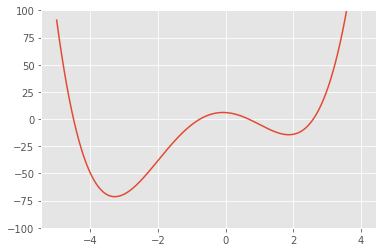

In [148]:
f = lambda x: x**4 + 2*x**3 - 12*x**2 - 2*x + 6
x = np.linspace(-5, 4, num=250)

fig, ax = plt.subplots()
ax.plot(x, f(x))
_ = ax.set_ylim(-100, 100)

Now lets calculate the minimum and argmin and highlight it:

(-100, 100)

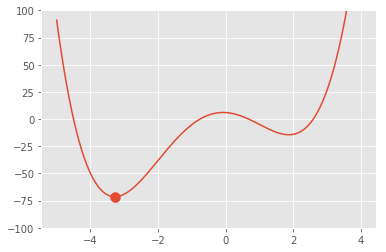

In [149]:
xmn, mn = x[np.argmin(f(x))], np.min(f(x))

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.scatter(xmn, mn, s=100)
_ = ax.set_ylim(-100, 100)